In [1]:
# Import libraries
import earthpy # Manage local data
import pandas as pd # Work with vector format data
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
# Addition for OLS Linear Regression
import numpy as np

In [2]:
# Format URL for data recovery (Portland, OR - https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00358634/detail)
por_url = ('https://www.ncei.noaa.gov/access/services/da'
'ta/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00358634&startDate=1948-01-01&endDate=2025-09-21&units=standard')
por_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00358634&startDate=1948-01-01&endDate=2025-09-21&units=standard'

In [3]:
# Download the climate data
por_climate_df = pd.read_csv(
    por_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
por_climate_df.head()

,STATION,TOBS
DATE,,
1948-01-01,USC00358634,NaN
1948-01-02,USC00358634,NaN
1948-01-03,USC00358634,NaN
1948-01-04,USC00358634,NaN
1948-01-05,USC00358634,NaN


In [4]:
# Save the climate data
por_climate_df.to_csv('portland_temp_data.csv')

In [5]:
por_climate_df

,STATION,TOBS
DATE,,
1948-01-01,USC00358634,NaN
1948-01-02,USC00358634,NaN
1948-01-03,USC00358634,NaN
1948-01-04,USC00358634,NaN
1948-01-05,USC00358634,NaN
...,...,...
2025-09-13,USC00358634,NaN
2025-09-14,USC00358634,NaN
2025-09-15,USC00358634,NaN


<Axes: ylabel='Frequency'>

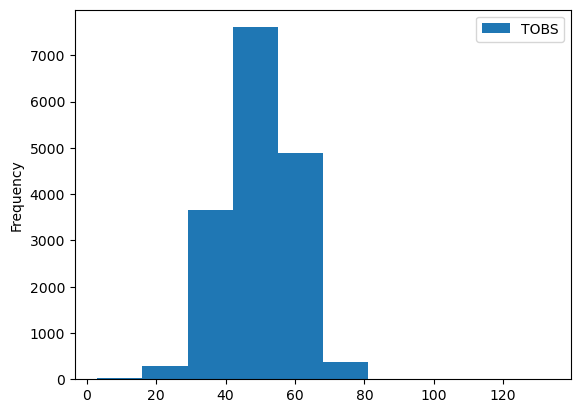

In [6]:
# Take a look at the contents of the dataframe
por_climate_df.plot.hist()

In [7]:
# Remove station column from dataframe
portland_climate_df = por_climate_df[["TOBS"]]
portland_climate_df

,TOBS
DATE,
1948-01-01,NaN
1948-01-02,NaN
1948-01-03,NaN
1948-01-04,NaN
1948-01-05,NaN
...,...
2025-09-13,NaN
2025-09-14,NaN
2025-09-15,NaN


In [8]:
# Rename the temperature column to reflect the unit of measure
portland_climate_df_units = portland_climate_df.rename(columns={
    'TOBS': 'temp_f',
})

portland_climate_df_units

,temp_f
DATE,
1948-01-01,NaN
1948-01-02,NaN
1948-01-03,NaN
1948-01-04,NaN
1948-01-05,NaN
...,...
2025-09-13,NaN
2025-09-14,NaN
2025-09-15,NaN


In [9]:
# Add a column converting the temperature data to degrees Celsius
portland_climate_df_units['temp_c'] = (portland_climate_df_units['temp_f'] - 32) * 5 / 9 
portland_climate_df_units

,temp_f,temp_c
DATE,,
1948-01-01,NaN,NaN
1948-01-02,NaN,NaN
1948-01-03,NaN,NaN
1948-01-04,NaN,NaN
1948-01-05,NaN,NaN
...,...,...
2025-09-13,NaN,NaN
2025-09-14,NaN,NaN
2025-09-15,NaN,NaN


<Axes: xlabel='DATE'>

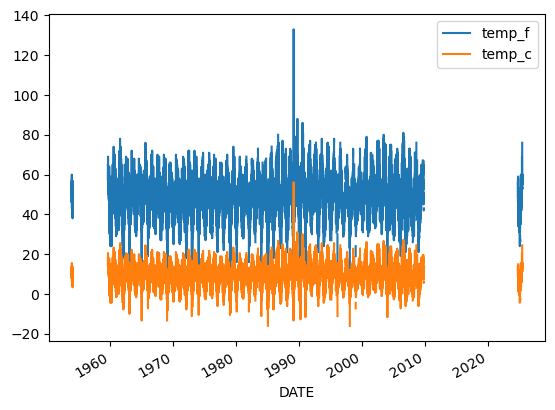

In [10]:
portland_climate_df_units.plot()

<Axes: title={'center': 'Daily Temperature in Portland OR'}, xlabel='Year', ylabel='Temperature (degrees C)'>

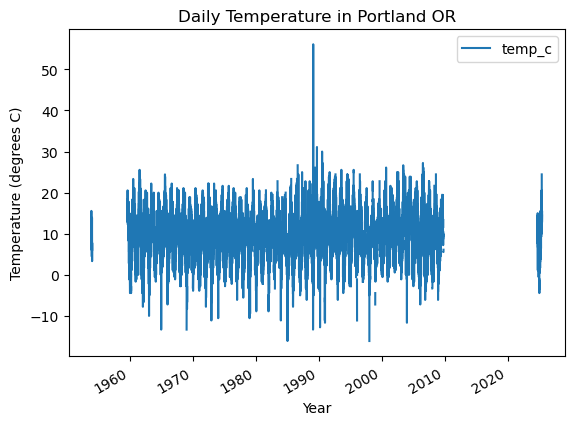

In [11]:
# Plot all the data
portland_climate_df_units.plot(
    y='temp_c',
    title='Daily Temperature in Portland OR',
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)

In [12]:
# Downsample the data to replot
portland_ann_climate_df = (
    portland_climate_df_units
    .resample('YE')  # 'YE' = year-end frequency
    .mean()
)
portland_ann_climate_df

,temp_f,temp_c
DATE,,
1948-12-31,NaN,NaN
1949-12-31,NaN,NaN
1950-12-31,NaN,NaN
1951-12-31,NaN,NaN
1952-12-31,NaN,NaN
...,...,...
2021-12-31,NaN,NaN
2022-12-31,NaN,NaN
2023-12-31,NaN,NaN


<Axes: title={'center': 'Annual Average Temperature in Portland OR'}, xlabel='Year', ylabel='Temperature (degrees C)'>

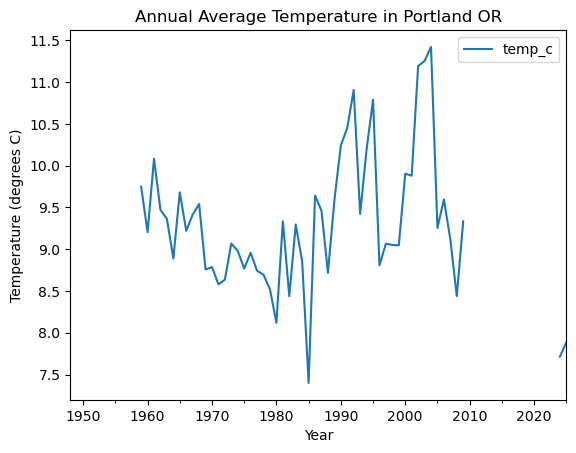

In [13]:
# Replot the annual data
portland_ann_climate_df.plot(
    y='temp_c',
    title='Annual Average Temperature in Portland OR',
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)

In [14]:
# Make an interactive plot
import hvplot.pandas

portland_interactive = portland_ann_climate_df.hvplot(
    y='temp_c',
    title='Annual Average Temperature in Portland OR'
).opts(
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)
portland_interactive

:Curve   [DATE]   (temp_c)

In [15]:
import holoviews as hv

hv.save(portland_interactive, 'portland_climate.html')

In [17]:
# Fit an OLS Linear Regression to the data
# Copy your annual climate DataFrame
df = portland_ann_climate_df.copy().reset_index(drop=True)

# Build a Year column (data start is 1948)
df['Year'] = np.arange(1948, 1948 + len(df))

# Keep only rows from 1959 and later
df = df[df['Year'] >= 1959]

# Exclude multiple years
exclude_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
df = df[~df['Year'].isin(exclude_years)]

# Map Temperature to the correct column
df['Temperature'] = df['temp_c']

# Prepare arrays for scikit-learn
X = df[['Year']].values
y = df['Temperature'].values

# Fit the regression
model = LinearRegression()
model.fit(X, y)

# Get slope and R²
slope = model.coef_[0]
r_squared = model.score(X, y)

print(f"Slope (°C per year): {slope}")
print(f"R²: {r_squared:.4f}")


Slope (°C per year): 0.016131681212785833
R²: 0.0880


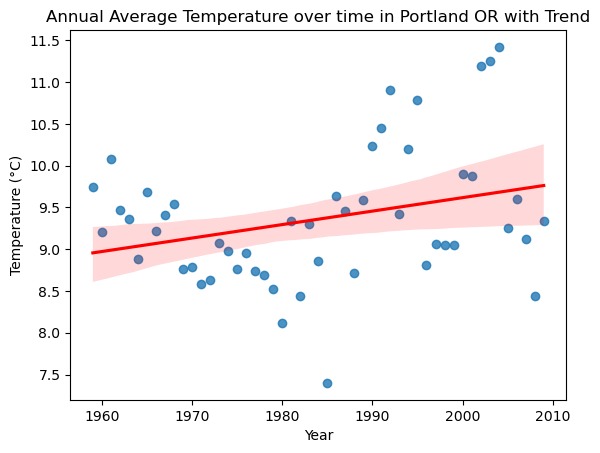

In [18]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x='Year',
    y='temp_c',
    data=df,
    line_kws={'color': 'red'}  # color for the trend line
)

ax.set(
    title='Annual Average Temperature over time in Portland OR with Trend',
    xlabel='Year',
    ylabel='Temperature (°C)'
)

plt.show()

### Portland Has Warmed ~0.16 °C per Decade Since 1958

A linear OLS regression shows an average warming rate of **0.016 °C per year** (≈ **0.16 °C per decade**). While the R² value is low (**0.088**), indicating that year-to-year variability is large, the overall trend suggests a gradual rise in Portland’s annual average temperature since the mid-20th century.